In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
ticker = "^GSPC"
data = yf.download(ticker, start ="2020-01-01", end ="2025-01-01")
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]
data.info()
data.head(10)       

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Open    1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
2020-01-09,3274.699951,3275.580078,3263.669922,3266.030029,3641230000
2020-01-10,3265.350098,3282.989990,3260.860107,3281.810059,3214580000
2020-01-13,3288.129883,3288.129883,3268.429932,3271.129883,3459390000
2020-01-14,3283.149902,3294.250000,3277.189941,3285.350098,3687620000


In [35]:
data['Close'] = data['Close'].ffill()
data['RunningMax'] = data['Close'].cummax()
data.tail(50)
data['Drawdown'] = data['Close']/data['RunningMax'] - 1.0
max_drawdown = data['Drawdown'].min()
print(f"Maximum Drawdown for {ticker}: {max_drawdown:.2%}")

Maximum Drawdown for ^GSPC: -33.92%


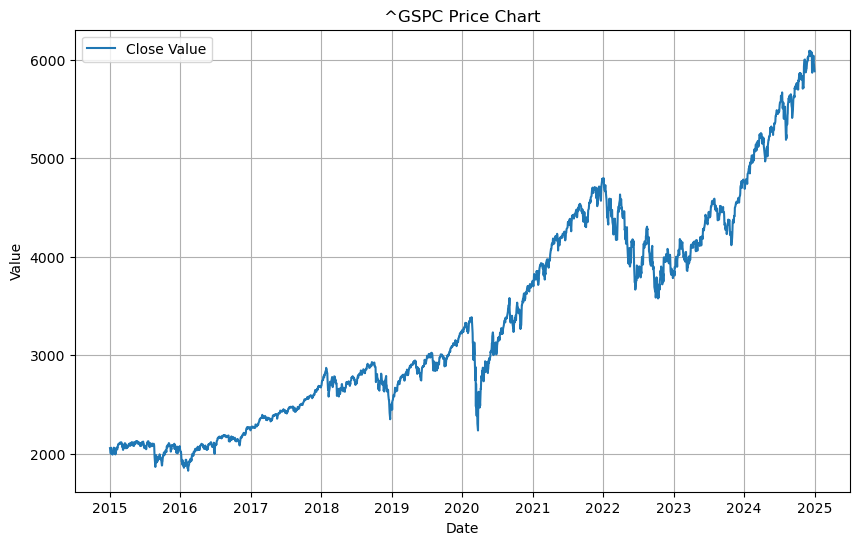

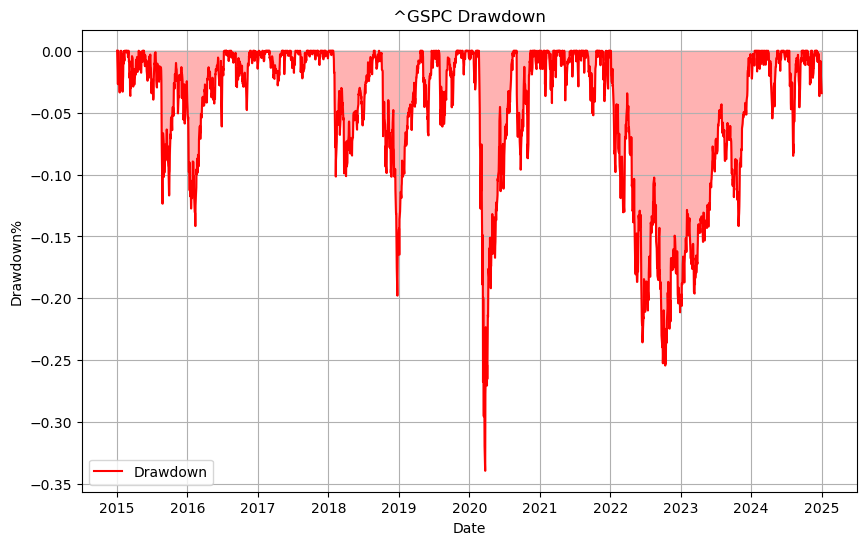

In [21]:
# Plot price
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Value')
plt.grid()
plt.title(f'{ticker} Price Chart')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot drawdown
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
plt.fill_between(data.index, data['Drawdown'], 0, color='red', alpha=0.3)
plt.title(f'{ticker} Drawdown')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Drawdown%')
plt.legend()
plt.show()